# Inference with Torch

## 导包

In [1]:
import sys
sys.path.append('../')
from unet import UNet

import numpy as np
import os 
from matplotlib import pyplot as plt
from skimage import io,transform
from PIL import Image

import torch

## 读取图片

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1918, 1280)


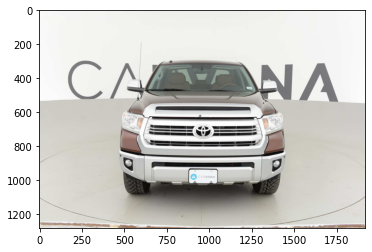

In [2]:
img = Image.open(os.path.join("images", "input.jpg"))
print(type(img))
print(img.size)
plt.imshow(img)

#### PIL -> ndarray

In [3]:
img = np.array(img)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1280, 1918, 3)
[249 249 249]
uint8


#### 换dims & 增加dims

In [4]:
img = img.transpose((2, 0, 1))
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(3, 1280, 1918)
[249 249 249 ... 249 249 249]
uint8


In [5]:
img = np.expand_dims(img, axis=0)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 ...
 [232 233 234 ... 179 180 180]
 [231 232 233 ... 194 194 195]
 [230 231 232 ... 208 207 209]]
uint8


#### uint8 -> float

In [6]:
if img.max() > 1:
    img = img / 255

print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 [0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 [0.97647059 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]
 ...
 [0.90980392 0.91372549 0.91764706 ... 0.70196078 0.70588235 0.70588235]
 [0.90588235 0.90980392 0.91372549 ... 0.76078431 0.76078431 0.76470588]
 [0.90196078 0.90588235 0.90980392 ... 0.81568627 0.81176471 0.81960784]]
float64


In [7]:
img = img.astype(np.float32)
print(type(img))
print(img.shape)
print(img[0][0])
print(img.dtype)

<class 'numpy.ndarray'>
(1, 3, 1280, 1918)
[[0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 [0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 [0.9764706  0.9764706  0.9764706  ... 0.9764706  0.9764706  0.9764706 ]
 ...
 [0.9098039  0.9137255  0.91764706 ... 0.7019608  0.7058824  0.7058824 ]
 [0.90588236 0.9098039  0.9137255  ... 0.7607843  0.7607843  0.7647059 ]
 [0.9019608  0.90588236 0.9098039  ... 0.8156863  0.8117647  0.81960785]]
float32


#### ndarray -> tensor

In [8]:
img_tensor = torch.from_numpy(img)
print(type(img_tensor))
print(img_tensor.shape)
print(img_tensor[0][0])
print(img_tensor.dtype)
print(img_tensor.device)

<class 'torch.Tensor'>
torch.Size([1, 3, 1280, 1918])
tensor([[0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
        [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
        [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
        ...,
        [0.9098, 0.9137, 0.9176,  ..., 0.7020, 0.7059, 0.7059],
        [0.9059, 0.9098, 0.9137,  ..., 0.7608, 0.7608, 0.7647],
        [0.9020, 0.9059, 0.9098,  ..., 0.8157, 0.8118, 0.8196]])
torch.float32
cpu


## 准备模型

In [9]:
net = UNet(n_channels=3, n_classes=1)
net.load_state_dict(torch.load("../checkpoints/CP_epoch100.pth"))
net

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, moment

## 推理

In [10]:
%%time
result = net(img_tensor)

CPU times: user 53.9 s, sys: 15.3 s, total: 1min 9s
Wall time: 8.79 s


In [11]:
print(type(result))
print(result.shape)
print(result[0][0])
print(result.dtype)
print(result.device)

<class 'torch.Tensor'>
torch.Size([1, 1, 1280, 1918])
tensor([[ -9.4249,  -8.9438,  -9.2379,  ...,  -8.0347,  -7.9442,  -8.6210],
        [ -9.3437,  -8.8374,  -9.1682,  ...,  -7.2030,  -7.0402,  -7.9208],
        [-10.3084, -10.1873, -10.2499,  ...,  -8.0738,  -7.7293,  -8.2644],
        ...,
        [-10.0772,  -9.9015, -10.1209,  ...,  -9.2628,  -8.7189,  -8.9979],
        [ -9.5514,  -9.2504,  -9.6686,  ...,  -8.2733,  -7.8446,  -8.4352],
        [ -9.7279,  -9.4886,  -9.8483,  ...,  -8.9305,  -8.7159,  -9.1226]],
       grad_fn=<SelectBackward>)
torch.float32
cpu


## 显示图片

In [12]:
result_numpy = result.detach().numpy()
print(type(result_numpy))
print(result_numpy.shape)
print(result_numpy.dtype)

<class 'numpy.ndarray'>
(1, 1, 1280, 1918)
float32


In [13]:
res = np.array(result_numpy[0][0])
print(type(res))
print(res.shape)

<class 'numpy.ndarray'>
(1280, 1918)


In [14]:
res

array([[ -9.424908 ,  -8.943816 ,  -9.237932 , ...,  -8.034723 ,
         -7.9441767,  -8.621018 ],
       [ -9.343653 ,  -8.837404 ,  -9.168201 , ...,  -7.2030344,
         -7.0401535,  -7.920772 ],
       [-10.308359 , -10.18729  , -10.2498665, ...,  -8.073778 ,
         -7.7293043,  -8.264383 ],
       ...,
       [-10.077192 ,  -9.90148  , -10.1208515, ...,  -9.262759 ,
         -8.71894  ,  -8.997914 ],
       [ -9.551406 ,  -9.250383 ,  -9.668641 , ...,  -8.273288 ,
         -7.844641 ,  -8.435245 ],
       [ -9.727871 ,  -9.488566 ,  -9.8483305, ...,  -8.930516 ,
         -8.715946 ,  -9.122603 ]], dtype=float32)

In [15]:
# res= Image.open("1.png")
# mat = np.array(src)
res = res.astype(np.uint8)
res = Image.fromarray(res, 'P')
# dst.save('new.png')
print(type(res))

<class 'PIL.Image.Image'>


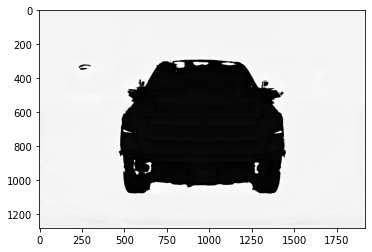

In [16]:
plt.imshow(res)